In [1]:
from pandas import read_pickle, DataFrame

In [2]:
data = read_pickle("app/data/data_all_features.pkl")

In [6]:
X_train = data.get("X_train")
y_train = data.get("y_train")
X_test = data.get("X_test")
feature_names = data.get("feature_names")
categorical = data.get("categorical")
numerical = data.get("numerical")
id_numeration_train = data.get("id_numeration_train")
id_numeration_test = data.get("id_numeration_test")

In [7]:
def get_visitor_dataframe(X_train, y_train):
    visitor_dataframe = DataFrame(columns=feature_names, data=X_train)
    visitor_dataframe["totals_transaction_revenue"] = y_train
    return visitor_dataframe

def remove_non_paying_visitors(visitor_dataframe):
    visits_with_positive_revenue = visitor_dataframe[visitor_dataframe["totals_transaction_revenue"] > 0]
    return visits_with_positive_revenue

In [8]:
visitor_dataframe = get_visitor_dataframe(X_train, y_train)


In [9]:
paying_visitor_dataframe = remove_non_paying_visitors(visitor_dataframe)

In [10]:
def get_filtered_paying_visitors(paying_visitor_dataframe, minimum_amount, maximum_value):
    filtered_paying_visitors = paying_visitor_dataframe[paying_visitor_dataframe["totals_transaction_revenue"] > minimum_amount]
    filtered_paying_visitors = filtered_paying_visitors[filtered_paying_visitors["totals_transaction_revenue"] < maximum_amount]
    return filtered_paying_visitors

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def get_category_total(paying_visitor_dataframe):
    return sum(paying_visitor_dataframe["totals_transaction_revenue"]) / 1000000

def plot_visitor_transactions(paying_visitor_dataframe, category_total, minimum_value=None, maximum_value=None):
    totals_transaction_revenue = paying_visitor_dataframe["totals_transaction_revenue"]
    total_visitors = len(totals_transaction_revenue.index)
    plt.hist(np.array(totals_transaction_revenue), bins=100, edgecolor='black')
    plt.xlabel('Revenue')
    plt.ylabel('Frequency')
    plt.title(f'between {minimum_value} - {maximum_value} | total $ {category_total} M | total visitor {total_visitors}')
    plt.show()
    return category_total

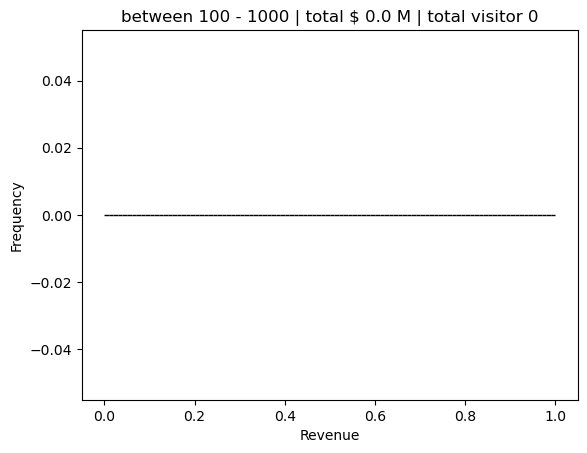

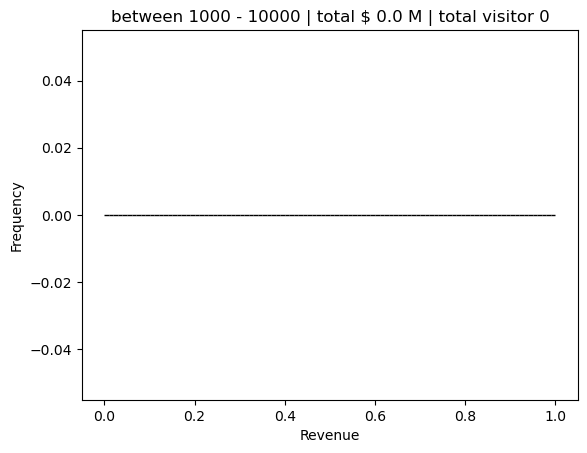

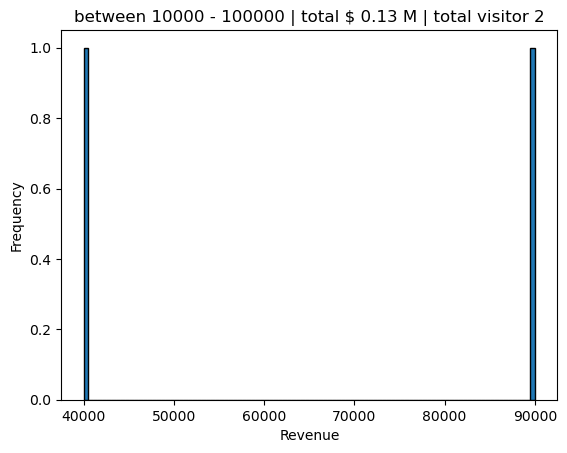

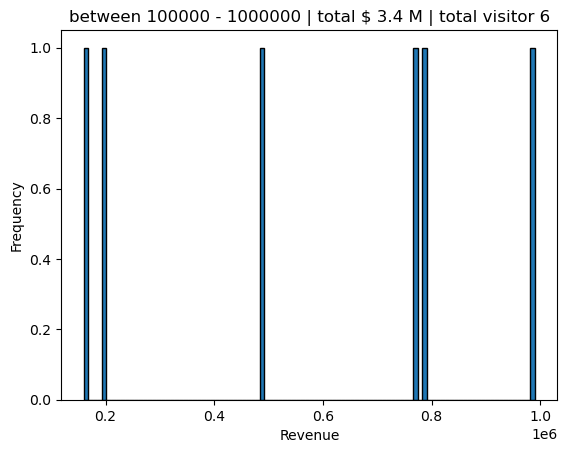

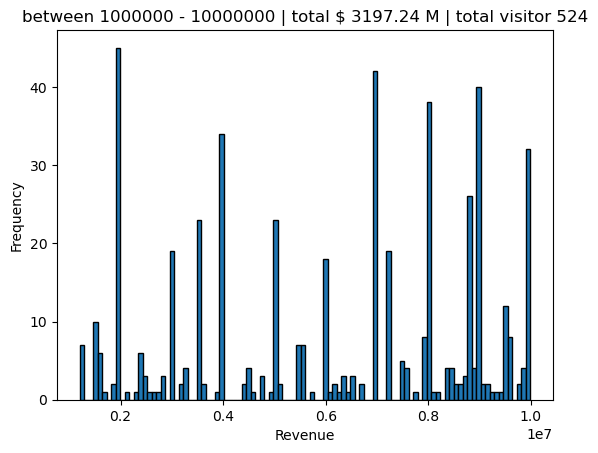

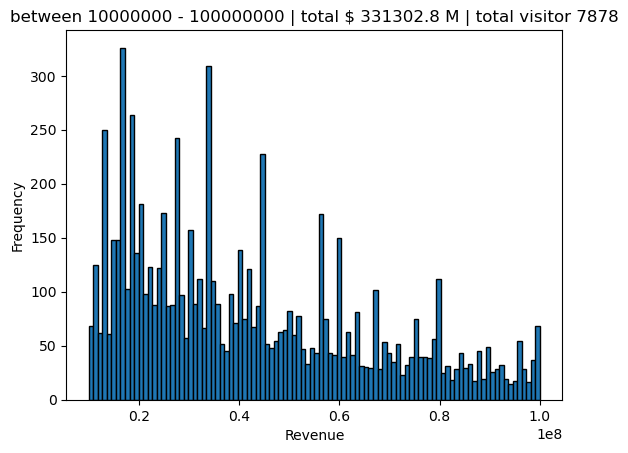

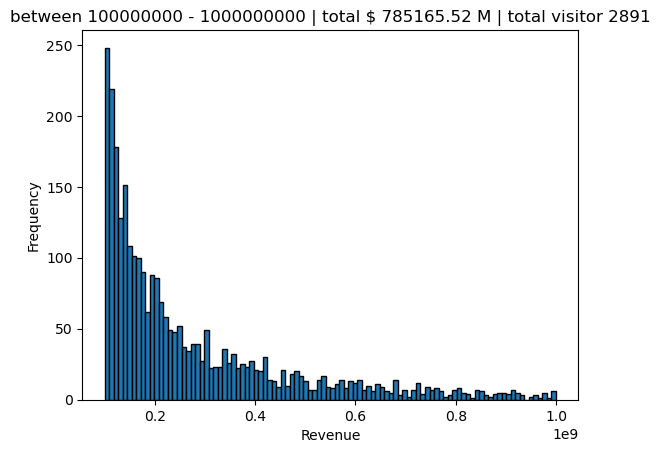

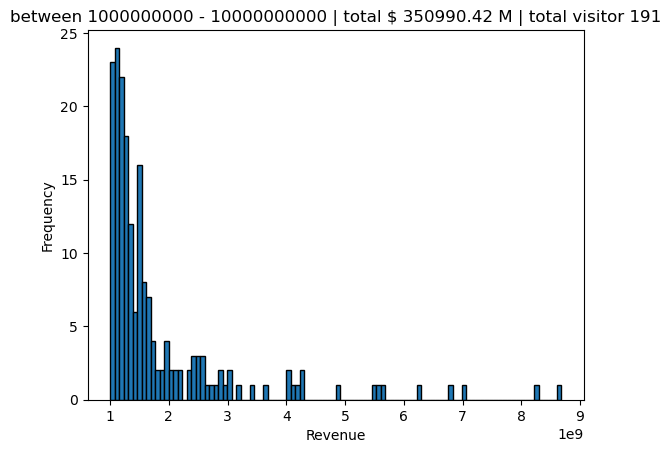

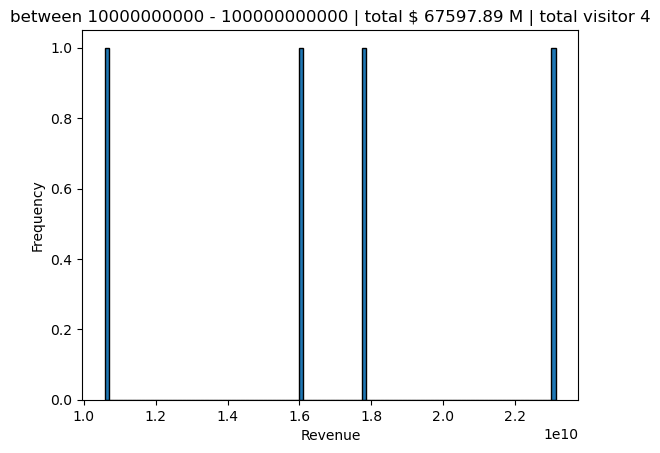

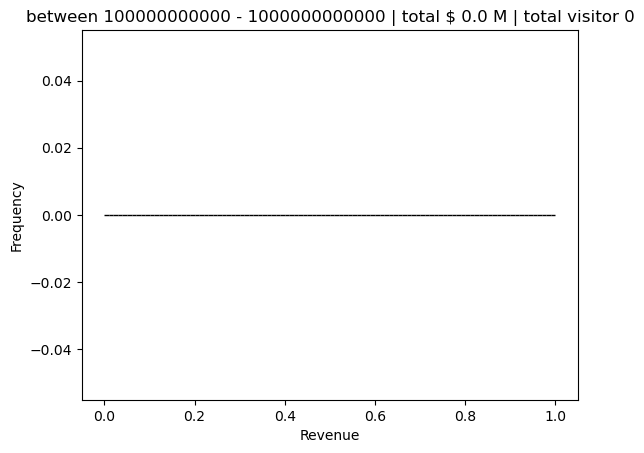

In [12]:
amount_list = [
    [100, 1000],
    [1000,10000],
    [10000,100000],
    [100000,1000000],
    [1000000,10000000],
    [10000000,100000000],
    [100000000,1000000000],
    [1000000000, 10000000000],
    [10000000000, 100000000000],
    [100000000000, 1000000000000]
]

category_total_list = []
for amount in amount_list:
    minimum_amount = amount[0]
    maximum_amount = amount[1]
    high_paying_visitors = get_filtered_paying_visitors(paying_visitor_dataframe, minimum_amount, maximum_amount)
    cateogry_total = get_category_total(high_paying_visitors)
    category_total = plot_visitor_transactions(high_paying_visitors, cateogry_total, minimum_amount, maximum_amount)
    category_total_list.append(category_total)

In [97]:
category_total_list

[0.0, 0.0, 0.013, 0.34, 319.724, 33130.28, 78516.552, 35099.042, 6759.789, 0.0]